# <<<<<<<<<<<<<<<<< Modelos >>>>>>>>>>>>>>>>>>>>>>>

GENERAR ARCHIVOS DE TRAIN Y TEST

In [721]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('../data/processed.csv')
df = df.loc[df['Visualizaciones']<35000,:] # Quito los 2 outliers

train, test = train_test_split(df, test_size=0.33, shuffle=True) # Pronto llegará la 33

train.to_csv('../data/train.csv', index=False)
test.to_csv('../data/test.csv', index=False)

CREACIÓN DE X y de Y

In [722]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=["Visualizaciones", "Título del vídeo"], axis=1)
y = df["Visualizaciones"]

In [723]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.33, random_state=33)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(163, 10)
(331, 10)
(163,)
(331,)


Escalado de los datos

In [724]:
from sklearn.preprocessing import StandardScaler

scal = StandardScaler()
scal.fit(X_train) 
X_train_scal = scal.transform(X_train)
X_test_scal = scal.transform(X_test)

#Para revertirlo
#X_train = scal.inverse_transform(X_train)

# 1. Regresión Logística

Hands on Machine Learning: "Just like a Linear Regression model, a Logistic Regression model computes a weighted sum of the input features (plus a bias term), but instead of outputting the result directly like the Linear Regression model does, it outputs the logistic of this result"

In [725]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

PREDICTORAS Y TARGET

In [726]:
X = train.drop(columns=['Visualizaciones', 'Título del vídeo'])
y = train['Visualizaciones']

In [727]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33, shuffle=True)

FIT

In [728]:
logr = LogisticRegression()

logr.fit(X_train, y_train)

C:\Users\Braulio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Predicciones

In [729]:
pred_logr = logr.predict(X_test)

EVALUACIÓN

In [730]:
print("MAE:", mean_absolute_error(y_test, pred_logr))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred_logr))) 

MAE: 417.3302752293578
RMSE: 1580.5414093876159


GUARDAR EL MODELO

In [731]:
import pickle
with open('../models/modelo_LogR.pkl', 'wb') as archivo:
    pickle.dump(logr, archivo)

# 2. Random Forest Regressor

Hands on Machine Learning : "Random Forests work by training many Decision Trees on random subsets of the features, then averaging out their predictions. Building a model on top of many other models is called Ensemble Learning, and it is often a great way to push ML algorithms even further"

In [732]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [733]:
df = pd.read_csv('../data/processed.csv')
df = df.loc[df['Visualizaciones']<35000,:] # Quito los 2 outliers

In [734]:
X = df.drop(columns=['Visualizaciones', 'Título del vídeo'])
y = df['Visualizaciones']

In [735]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33, shuffle=True)

PARÁMETROS Y GRIDSEARCHCV con Cross Validation

In [736]:
model = RandomForestRegressor(n_estimators=100, random_state=33)

parameters = {"max_depth":[1,2,3,4,5,6,7],
              "criterion": ['squared_error', 'absolute_error'],
              "min_samples_split": [2, 4, 8],
              "min_samples_leaf": [1, 2, 3, 4],
              "max_features": [2,3,4,5]
}

rfr_gs = GridSearchCV(model, parameters, cv=5, scoring="neg_mean_absolute_error", n_jobs= -1)

FIT

In [737]:
rfr_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=33), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7],
                         'max_features': [2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 4, 8]},
             scoring='neg_mean_absolute_error')

Mejores parámetros

In [738]:
rfr_gs.best_params_

{'criterion': 'absolute_error',
 'max_depth': 3,
 'max_features': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 8}

Mejor modelo Random Forest Regressor

In [739]:
mejor_modelo = RandomForestRegressor(
    criterion= 'absolute_error',
    max_depth=3,
    max_features=5,
    min_samples_leaf=2,
    min_samples_split=8)

Fit y predict del mejor modelo

In [740]:
mejor_modelo.fit(X_train, y_train)

RandomForestRegressor(criterion='absolute_error', max_depth=2, max_features=5,
                      min_samples_split=4)

In [741]:
y_pred = mejor_modelo.predict(X_test)

Visualización del mejor modelo

In [742]:
""" plt.figure(figsize=(15, 10))
plot_tree(mejor_modelo.estimators_[0], feature_names=X.columns, filled=True, rounded=True, fontsize=12)
plt.show() """

' plt.figure(figsize=(15, 10))\nplot_tree(mejor_modelo.estimators_[0], feature_names=X.columns, filled=True, rounded=True, fontsize=12)\nplt.show() '

Evaluación del modelo

In [743]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred))) 

MAE: 283.3766768292683
MSE: 2054983.3120434452
RMSE: 1433.5212980780736


Guardar el modelo

In [744]:
import pickle
with open('../models/modelo_RFR.pkl', 'wb') as archivo:
    pickle.dump(mejor_modelo, archivo)

# 3. Decision Tree Regressor

Hands On Machine Learning: "This is a powerful model, capable of finding complex nonlinear relationships in the data"

In [745]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

In [746]:
#OJO QUE AQUI EMPIEZO CON TODOS LOS DATOS (data =) NO CON train =

df = pd.read_csv('../data/processed.csv')
df = df.loc[df['Visualizaciones']<35000,:] # Quito los 2 outliers
df['Visualizaciones'] = df.Visualizaciones
#data.head()

GRAFICO PARA VER LA CORRELACION DE LAS VARIABLES

C:\Users\Braulio\AppData\Local\Temp\ipykernel_8768\76312196.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  bars = df.corr()['Visualizaciones'].sort_values(ascending=False).plot(kind='bar')


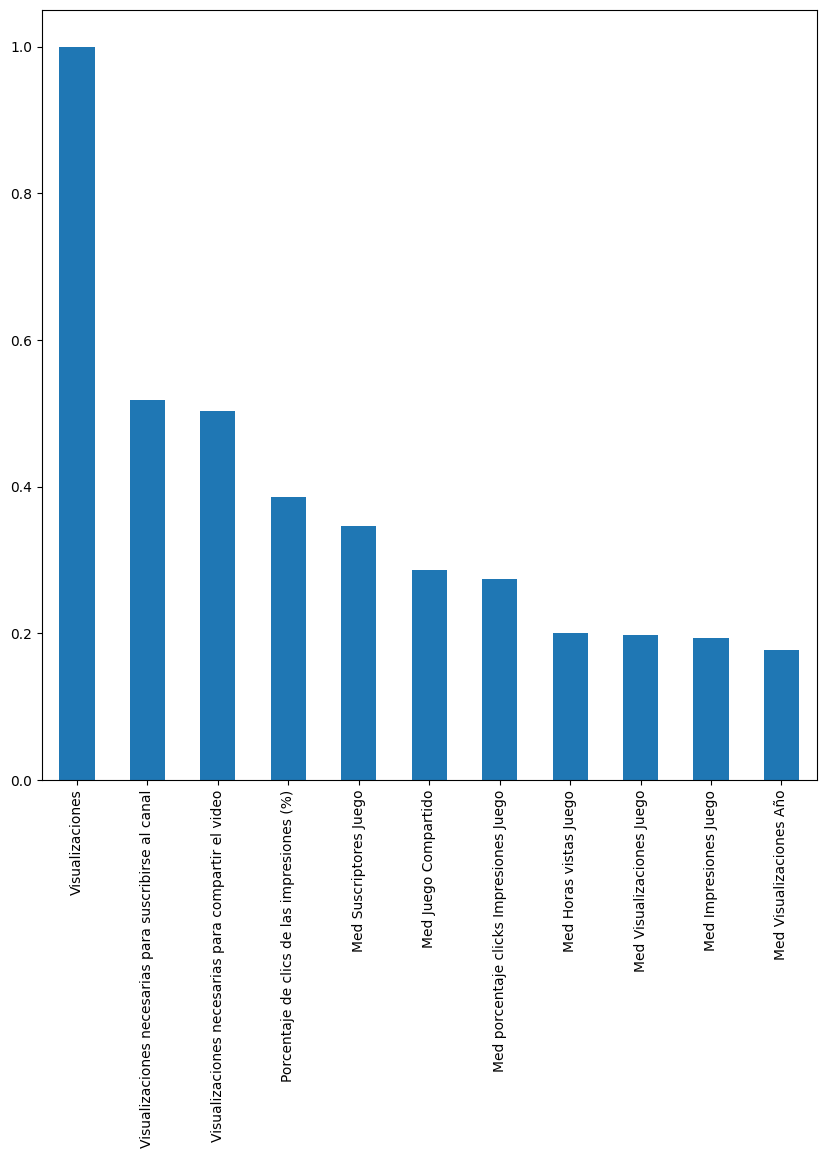

In [747]:
plt.figure(figsize=(10,10))
bars = df.corr()['Visualizaciones'].sort_values(ascending=False).plot(kind='bar')

SLIPT DE TEST Y DATA

In [748]:
X = df.drop(columns=['Visualizaciones', 'Título del vídeo'])
y = df['Visualizaciones']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33, shuffle=True)

DECISION TREE CON SUS PARÁMETROS

In [749]:
param_grid = {
    'max_depth': [None, 2, 3, 4]
}

dt_model = GridSearchCV(
    DecisionTreeRegressor(random_state=33),
    cv=10,
    scoring='neg_mean_squared_error',
    param_grid=param_grid
)

Fit del modelo

In [750]:
dt_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=33),
             param_grid={'max_depth': [None, 2, 3, 4]},
             scoring='neg_mean_squared_error')

In [751]:
y_pred = dt_model.predict(X_test)

Evaluación

In [752]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error (MAE): 395.0899688858332
Root Mean Squared Error (RMSE): 1427.6562063404347


AÑADIR UNA NUEVA FEATURE USANDO EL DECISION TREE COMBINANDO LAS 3 VARIABLES MÁS CORRELADAS

In [753]:
""" corr = df.corr().abs() #para sacar las correlaciones en valores absolutos
corr_visual = corr.loc[:,['Visualizaciones']] #para sacar las correlaciones de 'Visualizaciones'
corr_visual.sort_values(ascending=False, by = 'Visualizaciones') #en orden """

" corr = df.corr().abs() #para sacar las correlaciones en valores absolutos\ncorr_visual = corr.loc[:,['Visualizaciones']] #para sacar las correlaciones de 'Visualizaciones'\ncorr_visual.sort_values(ascending=False, by = 'Visualizaciones') #en orden "

Variables en una lista y RE-FIT del modelo mejorado

In [754]:
features_selecc = ['Visualizaciones necesarias para suscribirse al canal', 'Porcentaje de clics de las impresiones (%)', 'Visualizaciones necesarias para compartir el video'] #seleccionar las 3 mejores

dt_model.fit(X_train[features_selecc], y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=33),
             param_grid={'max_depth': [None, 2, 3, 4]},
             scoring='neg_mean_squared_error')

Predict del modelo de las 3 variables

In [755]:
y_pred_3 = dt_model.predict(X_test[features_selecc])

Ha mejorado un poco:

In [756]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred_3))  
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred_3)))

Mean Absolute Error (MAE): 357.7813300478895
Root Mean Squared Error (RMSE): 1308.3673416595332


Visualización

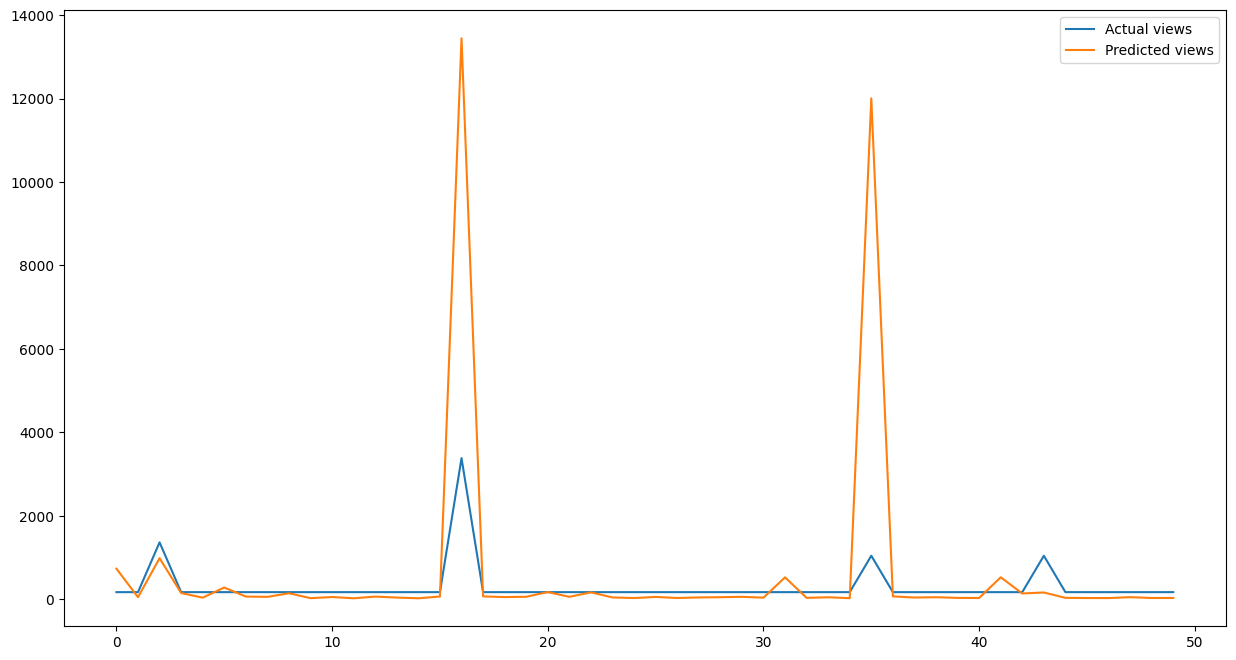

In [757]:
test = pd.DataFrame({'Predicted views':y_pred_3, 'Actual views':y_test})
fig= plt.figure(figsize=(15,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)

plt.plot(test[:50])
plt.legend(['Actual views','Predicted views'])

In [758]:
import pickle
with open('../models/modelo_DT.pkl', 'wb') as archivo:
    pickle.dump(dt_model, archivo)

# 4. Linear Regression

Hands On Machine Learning: "The simplest and most commonly used."

In [759]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [760]:
df = pd.read_csv('../data/processed.csv')
df = df.loc[df['Visualizaciones']<35000,:] # Quito los 2 outliers

In [761]:
X = df.drop(columns=['Visualizaciones', 'Título del vídeo'])
y = df['Visualizaciones']

In [762]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33, shuffle=True)

Escalado

In [763]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [764]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

Predicts

In [765]:
y_pred = lr_model.predict(X_test)

Visualización

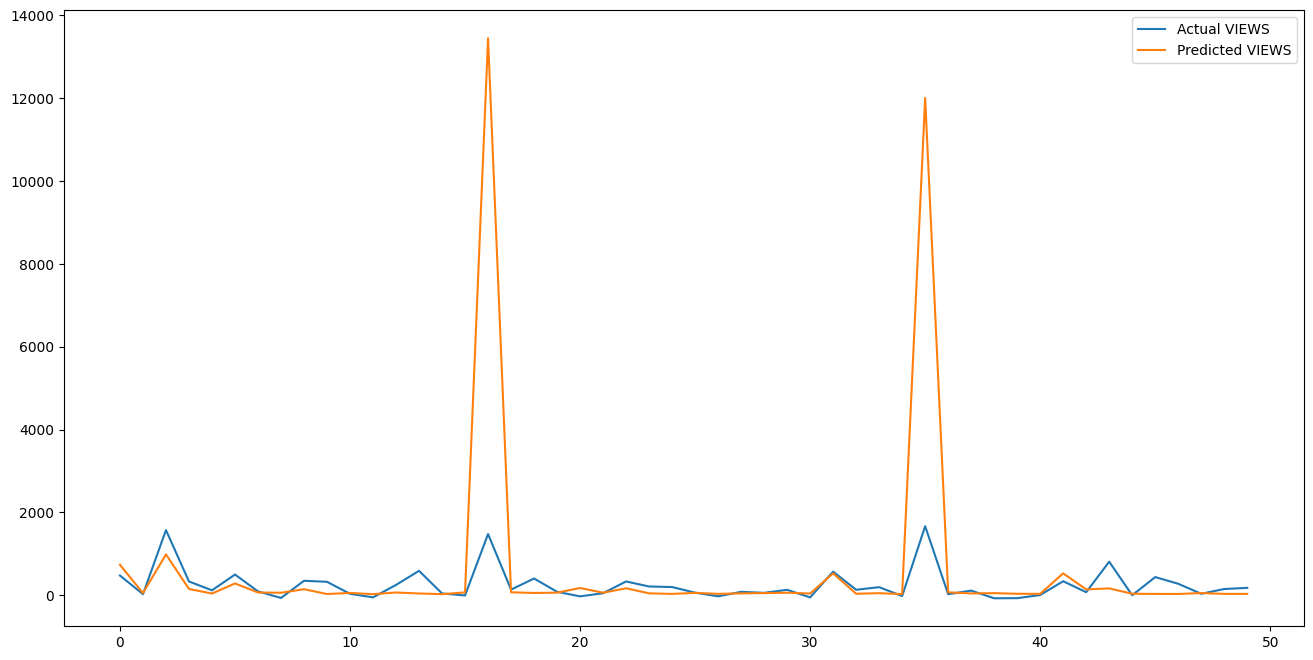

In [766]:
test = pd.DataFrame({'Predicted VIEWS':y_pred, 'Actual VIEWS':y_test})
fig= plt.figure(figsize=(16,8))

test = test.reset_index()
test = test.drop(['index'],axis=1)

plt.plot(test[:50])
plt.legend(['Actual VIEWS','Predicted VIEWS'])

Evaluación

In [767]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred))) 

MAE: 360.4996123289895
MSE: 1903199.329447631
RMSE: 1379.5649058480833


Guardar modelo

In [768]:
import pickle
with open('../models/modelo_LinR.pkl', 'wb') as archivo:
    pickle.dump(lr_model, archivo)

# 5. XGBRegressor Con GridSearchCV

Hands On Machine Learning: "It is worth noting that an optimized implementation of Gradient Boosting is available
in the popular python library XGBoost, which stands for Extreme Gradient Boosting."

In [769]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

In [770]:
df = pd.read_csv('../data/processed.csv')
df = df.loc[df['Visualizaciones']<35000,:] # Quito los 2 outliers

In [771]:
X = df.drop(columns=['Visualizaciones', 'Título del vídeo'])
y = df['Visualizaciones']

In [772]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33, shuffle=True)

Escalado

In [773]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [774]:
regressor = XGBRegressor()
model = regressor.fit(X_train, y_train)
y_pred = model.predict(X_test)

Visualización

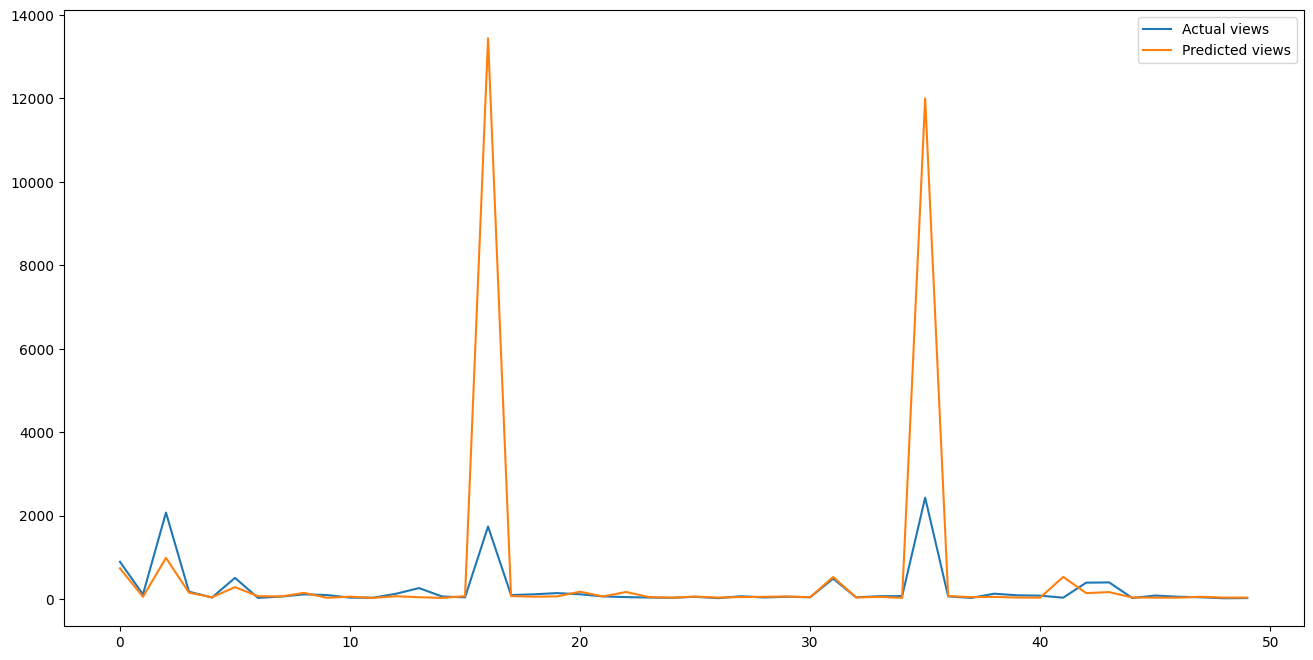

In [775]:
test = pd.DataFrame({'Predicted views':y_pred, 'Actual views':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual views','Predicted views'])

In [776]:
model.get_params() #para ver que parametros tiene

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

En la celda de abajo se hizo el GridSearchCV, ahora comentado.

In [777]:
""" param_grid = dict(
    n_jobs=[-1],
    learning_rate=[0.1, 0.5],
    objective=['reg:squarederror'],
    max_depth=[5, 10, 15], 
    n_estimators=[100, 500, 1000],
    subsample=[0.2, 0.8, 1.0],
    gamma=[0.05, 0.5],
    scale_pos_weight=[0, 1],
    reg_alpha=[0, 0.5],
    reg_lambda=[1, 0],
)

model = XGBRegressor(random_state=1, verbosity=1)

grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           scoring='neg_root_mean_squared_error',
                           )

best_model = grid_search.fit(X_train, y_train)
print('Mejores parametros:', best_model.best_params_) """

" param_grid = dict(\n    n_jobs=[-1],\n    learning_rate=[0.1, 0.5],\n    objective=['reg:squarederror'],\n    max_depth=[5, 10, 15], \n    n_estimators=[100, 500, 1000],\n    subsample=[0.2, 0.8, 1.0],\n    gamma=[0.05, 0.5],\n    scale_pos_weight=[0, 1],\n    reg_alpha=[0, 0.5],\n    reg_lambda=[1, 0],\n)\n\nmodel = XGBRegressor(random_state=1, verbosity=1)\n\ngrid_search = GridSearchCV(estimator=model,\n                           param_grid=param_grid,\n                           scoring='neg_root_mean_squared_error',\n                           )\n\nbest_model = grid_search.fit(X_train, y_train)\nprint('Mejores parametros:', best_model.best_params_) "

FIT DE LOS MEJORES PARÁMETROS DEL MODELO

In [778]:
regressor = XGBRegressor(
    gamma=0.05,
    learning_rate=0.1,
    max_depth=5,
    n_estimators=100,
    objective='reg:squarederror',
    subsample=0.2,
    scale_pos_weight=0,
    reg_alpha=0,
    reg_lambda=1
)
model = regressor.fit(X_train, y_train)
y_pred = model.predict(X_test)

Visualización del modelo mejorado

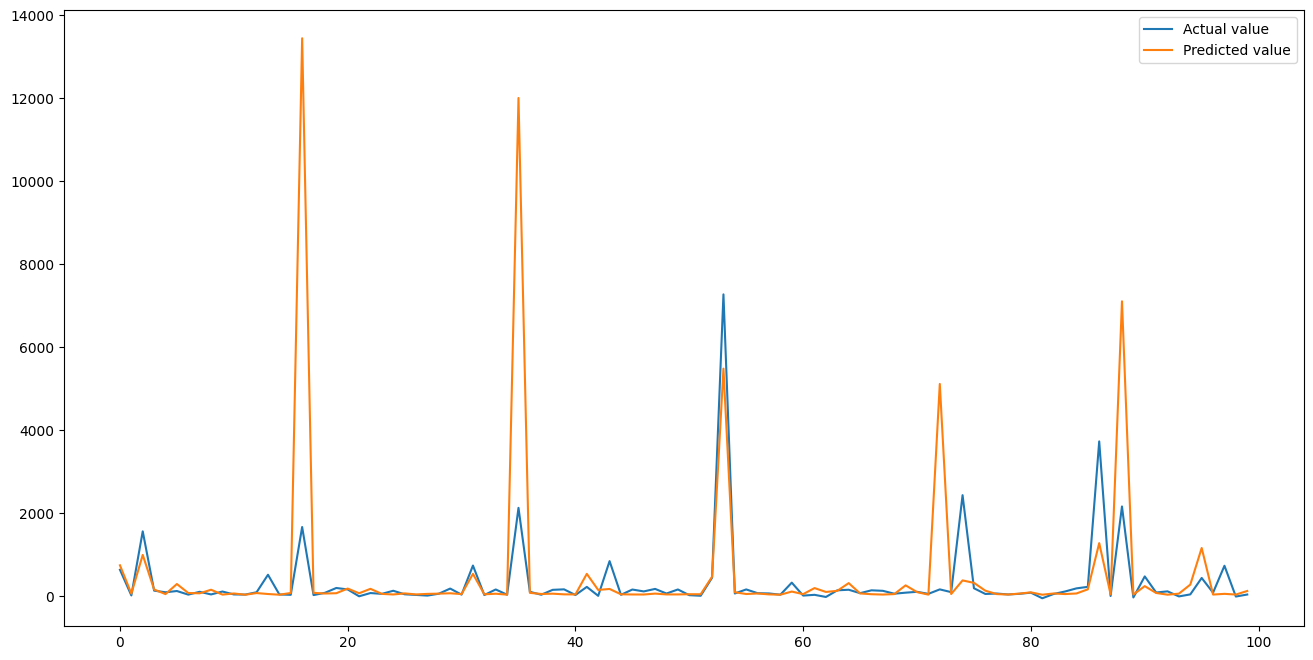

In [779]:
test = pd.DataFrame({'Predicted value':y_pred, 'Actual value':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:100])
plt.legend(['Actual value','Predicted value'])

Evaluación del modelo *[Es el mejor modelo]*

In [780]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred))) 

MAE: 353.7190232458638
MSE: 1922394.2027668946
RMSE: 1386.504310403287


Guardar modelo

In [781]:
import pickle
with open('../models/modelo_XGB.pkl', 'wb') as archivo:
    pickle.dump(model, archivo)

YAML puesto que es el mejor modelo:

In [782]:
import yaml
with open('../models/modelo_config_def.yaml', 'w') as c:
    yaml.dump(model, c)

# EXTRA. TEST para sacar el MEJOR Modelo e intentar mejorarlo

In [783]:
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lars
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.svm import SVR
from sklearn.svm import NuSVR
from sklearn.svm import LinearSVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.isotonic import IsotonicRegression
from sklearn.ensemble import RandomForestRegressor

CARGAMOS EL DATA

In [784]:
df = pd.read_csv('../data/processed.csv')
df = df.loc[df['Visualizaciones']<35000,:] # Quito los 2 outliers

In [785]:
#df['Visualizaciones']

Train y test

In [786]:
X = df.drop(columns=['Visualizaciones', 'Título del vídeo'])
y = df['Visualizaciones']

In [787]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33, shuffle=True)

Escalado de los datos

In [788]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

SELECCIÓN DE ENTRE TODOS LOS MODELOS DE REGRESIÓN

In [789]:
regressors = {
    "XGBRegressor": XGBRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "GaussianProcessRegressor": GaussianProcessRegressor(),
    "SVR": SVR(),
    "NuSVR": NuSVR(),
    "LinearSVR": LinearSVR(),
    "KernelRidge": KernelRidge(),
    "LinearRegression": LinearRegression(),
    "Ridge":Ridge(),
    "Lars": Lars(),
    "TheilSenRegressor": TheilSenRegressor(),
    "HuberRegressor": HuberRegressor(),
    "PassiveAggressiveRegressor": PassiveAggressiveRegressor(),
    "ARDRegression": ARDRegression(),
    "BayesianRidge": BayesianRidge(),
    "ElasticNet": ElasticNet(),
    "OrthogonalMatchingPursuit": OrthogonalMatchingPursuit(),
}

In [790]:
df_models = pd.DataFrame(columns=['model', 'run_time', 'rmse', 'rmse_cv', 'mae'])

for key in regressors:

    print('*',key)

    start_time = time.time()

    regressor = regressors[key]
    model = regressor.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    scores = cross_val_score(model, 
                             X_train, 
                             y_train,
                             scoring="neg_mean_squared_error", 
                             cv=10)

    row = {'model': key,
           'run_time': format(round((time.time() - start_time)/60,2)),
           'rmse': round(np.sqrt(mean_squared_error(y_test, y_pred))),
           'rmse_cv': round(np.mean(np.sqrt(-scores))),
           'mae': round(mean_absolute_error(y_test, y_pred))
    }

    df_models = df_models.append(row, ignore_index=True)

* XGBRegressor


C:\Users\Braulio\AppData\Local\Temp\ipykernel_8768\3135114373.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)


* RandomForestRegressor


C:\Users\Braulio\AppData\Local\Temp\ipykernel_8768\3135114373.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)
C:\Users\Braulio\AppData\Local\Temp\ipykernel_8768\3135114373.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)
C:\Users\Braulio\AppData\Local\Temp\ipykernel_8768\3135114373.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)


* DecisionTreeRegressor
* GaussianProcessRegressor
* SVR


C:\Users\Braulio\AppData\Local\Temp\ipykernel_8768\3135114373.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)
C:\Users\Braulio\AppData\Local\Temp\ipykernel_8768\3135114373.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)
C:\Users\Braulio\AppData\Local\Temp\ipykernel_8768\3135114373.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)
C:\Users\Braulio\AppData\Local\Temp\ipykernel_8768\3135114373.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.app

* NuSVR
* LinearSVR
* KernelRidge
* LinearRegression
* Ridge
* Lars


C:\Users\Braulio\AppData\Local\Temp\ipykernel_8768\3135114373.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)


* TheilSenRegressor


C:\Users\Braulio\AppData\Local\Temp\ipykernel_8768\3135114373.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)
C:\Users\Braulio\AppData\Local\Temp\ipykernel_8768\3135114373.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)
C:\Users\Braulio\AppData\Local\Temp\ipykernel_8768\3135114373.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)


* HuberRegressor
* PassiveAggressiveRegressor
* ARDRegression
* BayesianRidge
* ElasticNet
* OrthogonalMatchingPursuit


C:\Users\Braulio\AppData\Local\Temp\ipykernel_8768\3135114373.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)
C:\Users\Braulio\AppData\Local\Temp\ipykernel_8768\3135114373.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)
C:\Users\Braulio\AppData\Local\Temp\ipykernel_8768\3135114373.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)
C:\Users\Braulio\AppData\Local\Temp\ipykernel_8768\3135114373.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.app

Abajo se ven ordenados los resultados del dataframe df_models en función de la puntuación MAE obtenida de todos los modelos de regresión.

El modelo HuberRegressor llega a 281, mucho menos de lo que yo había conseguido yo con XGBRegressor.

In [791]:
df_models.head(10).sort_values(by='mae', ascending=True)

,model,run_time,rmse,rmse_cv,mae
1,RandomForestRegressor,0.05,1330,706,303
9,Ridge,0.0,1379,643,359
8,LinearRegression,0.0,1380,645,360
6,LinearSVR,0.0,1589,839,361
2,DecisionTreeRegressor,0.0,1501,888,374
0,XGBRegressor,0.01,1454,798,383
4,SVR,0.0,1655,892,396
5,NuSVR,0.0,1643,874,428
7,KernelRidge,0.0,1462,753,549
3,GaussianProcessRegressor,0.0,74041,74519,13709


In [792]:
regressor = HuberRegressor()
model = regressor.fit(X_train, y_train)
y_pred = model.predict(X_test)

Mejorar los hiperparámetros del modelo:

Para ajustar el modelo HuberRegressor() (o cualquier modelo), hay que mirar qué hiperparámetros están disponibles para ajustar con el model.get_params().

In [793]:
model.get_params()

{'alpha': 0.0001,
 'epsilon': 1.35,
 'fit_intercept': True,
 'max_iter': 100,
 'tol': 1e-05,
 'warm_start': False}

Hay que seleccionar algunos de los hiperparámetros y agregarlos a un dict() y asignándolos a param_grid. Luego se ejecuta la función GridSearchCV para probar cada combinación única de hiperparámetros y así encontrar los hiperparámetros óptimos del modelo. (Ahora está comentado porque ya se pensó el mejor modelo con esos parámetros)

In [794]:
param_grid = dict(
 alpha= [0.0001, 0.0003, 0.0005],
 epsilon= [1, 1.35, 1.70, 2],
 fit_intercept= [True],
 max_iter= [100, 150, 200],
 tol= [1e-05],
 warm_start= [False])

model = HuberRegressor()

grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           scoring='neg_root_mean_squared_error',
                           )

best_model = grid_search.fit(X_train, y_train)
print('Best parameters:', best_model.best_params_)

C:\Users\Braulio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Braulio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Braulio

Best parameters: {'alpha': 0.0005, 'epsilon': 2, 'fit_intercept': True, 'max_iter': 100, 'tol': 1e-05, 'warm_start': False}


FIT y EVALUACIÓN del mejor modelo elegido

In [795]:
regressor = HuberRegressor(
 alpha= 0.0005,
 epsilon= 2,
 fit_intercept= True,
 max_iter= 100,
 tol= 1e-05,
 warm_start= False)

model = regressor.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test, y_pred))))
print('RMSE_CV:',round(np.mean(np.sqrt(-scores)))) 

MAE: 289.70742232688366
RMSE: 1416
RMSE_CV: 743


# 6. PCA. Modelo No Supervisado.

In [796]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline

In [797]:
X = train.drop(columns=['Visualizaciones', 'Título del vídeo'])

In [798]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [799]:
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_scaled)

In [800]:
pca.explained_variance_ratio_.cumsum()

array([0.51000361, 0.69634998, 0.79055662, 0.86843098, 0.91295546,
       0.94528992, 0.97095789, 0.99373301, 0.99866986])

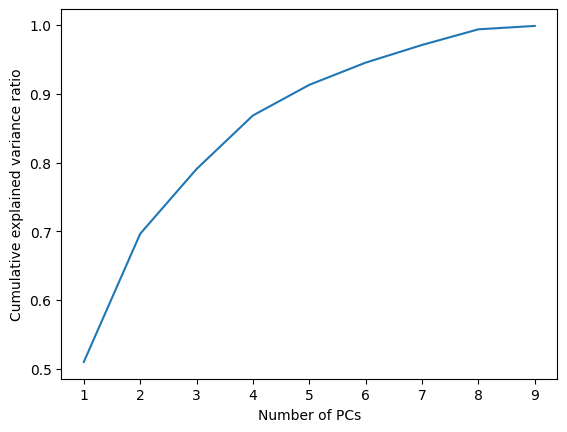

In [801]:
plt.plot(pd.Series(pca.explained_variance_ratio_.cumsum(), index=np.arange(1,10)))
plt.xlabel('Number of PCs')
plt.ylabel("Cumulative explained variance ratio");

Visualización:

<Figure size 2500x3500 with 0 Axes>

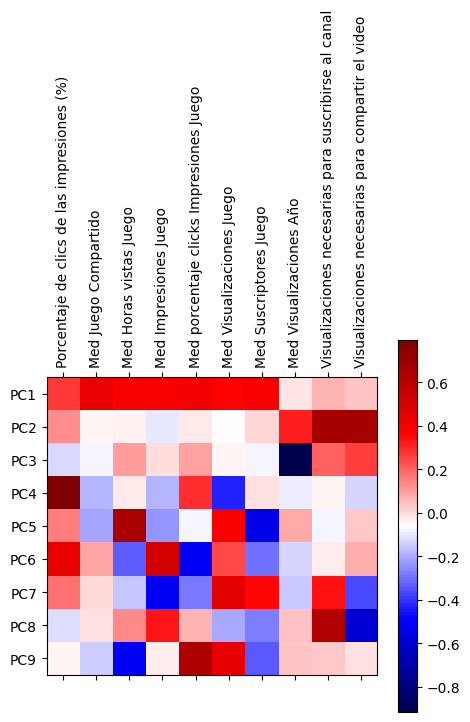

In [802]:
plt.figure(figsize=(25, 35))
plt.matshow(pca.components_[:9], cmap='seismic')
plt.yticks([0,1,2,3,4,5,6,7,8],['PC1','PC2','PC3','PC4','PC5','PC6', 'PC7', 'PC8', 'PC9'])
plt.xticks(range(len(X.columns)), X.columns, rotation=90)
plt.colorbar()
plt.show()

In [803]:
pd.DataFrame(pca.components_[:9], columns=X.columns, index=['PC1','PC2','PC3','PC4','PC5', 'PC6','PC7','PC8', 'PC9'])

,Porcentaje de clics de las impresiones (%),Med Juego Compartido,Med Horas vistas Juego,Med Impresiones Juego,Med porcentaje clicks Impresiones Juego,Med Visualizaciones Juego,Med Suscriptores Juego,Med Visualizaciones Año,Visualizaciones necesarias para suscribirse al canal,Visualizaciones necesarias para compartir el video
PC1,0.272406,0.427348,0.381087,0.384800,0.395403,0.367477,0.390654,-0.018078,0.064565,0.037175
PC2,0.130339,-0.044449,-0.035072,-0.095586,-0.027371,-0.054763,0.008161,0.315550,0.662319,0.654688
PC3,-0.125746,-0.077201,0.105766,-0.005070,0.094218,-0.047396,-0.077543,-0.916370,0.200603,0.264394
PC4,0.794259,-0.181588,-0.025588,-0.186201,0.287985,-0.435251,-0.012951,-0.090911,-0.044487,-0.134394
PC5,0.155344,-0.214474,0.647712,-0.235049,-0.078979,0.380966,-0.538593,0.081999,-0.077782,0.029338
PC6,0.437363,0.091648,-0.333066,0.506613,-0.510832,0.241789,-0.297806,-0.134208,-0.031889,0.074802
PC7,0.173949,0.004963,-0.154999,-0.510848,-0.282102,0.455542,0.356289,-0.153001,0.338632,-0.364148
PC8,-0.119711,-0.011923,0.134004,0.327835,0.065659,-0.201430,-0.280047,0.040124,0.626353,-0.585539
PC9,-0.045213,-0.147874,-0.513058,-0.031192,0.632216,0.444374,-0.335641,0.033303,0.029042,-0.010723


In [804]:
pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=5)),
    ('classifier', XGBRegressor())
])
pipe

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=5)),
                ('classifier',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [805]:
params= {
    'scaler': [StandardScaler(), None],
    'pca__n_components': [5,6,7],
    'classifier__max_depth': np.arange(3,7),
}

gs = GridSearchCV(pipe, params, cv=5, scoring='neg_mean_absolute_error')

In [806]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=5)),
                                       ('classifier',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     feature_types=None,
                                                     gamma=None, gpu_id=None,
                                                     g...
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     n_estimators=100,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     predictor=None,
                                                     random_state=None, ...))]),
             param_grid={'classifier__max_depth': array([3, 4, 5, 6]),
                         'pca__n_components': [5, 6, 7],
                         'scaler': [StandardScaler(), None]},
             scoring='neg_mean_absolute_error')

Predict

In [807]:
y_pred = gs.predict(X_test)

Valoración (Da mejor MAE que con el XGBRegressor solo)

In [808]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

MAE: 301.2342035305209
MSE: 1733916.763034259


Guardar último modelo

In [809]:
import pickle
with open('../models/modelo_PCA.pkl', 'wb') as archivo:
    pickle.dump(gs, archivo)